Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0           ALB
1           ALB
2           DZA
3           DZA
4           ARG
         ...   
463    OWID_WRL
464         ZMB
465         ZMB
466         ZWE
467         ZWE
Name: Code, Length: 468, dtype: object
0      2015
1      2020
2      2015
3      2020
4      2015
       ... 
463    2020
464    2015
465    2020
466    2015
467    2020
Name: Year, Length: 468, dtype: int64


TypeError: string indices must be integers

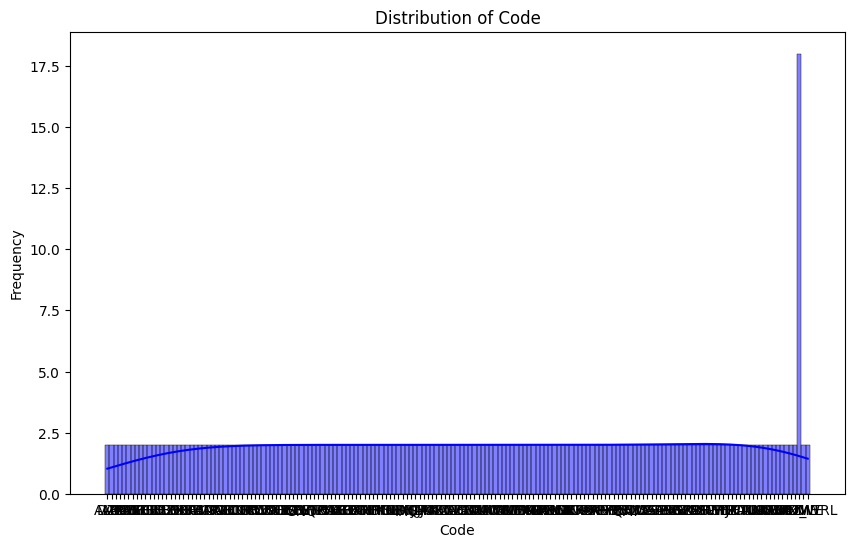

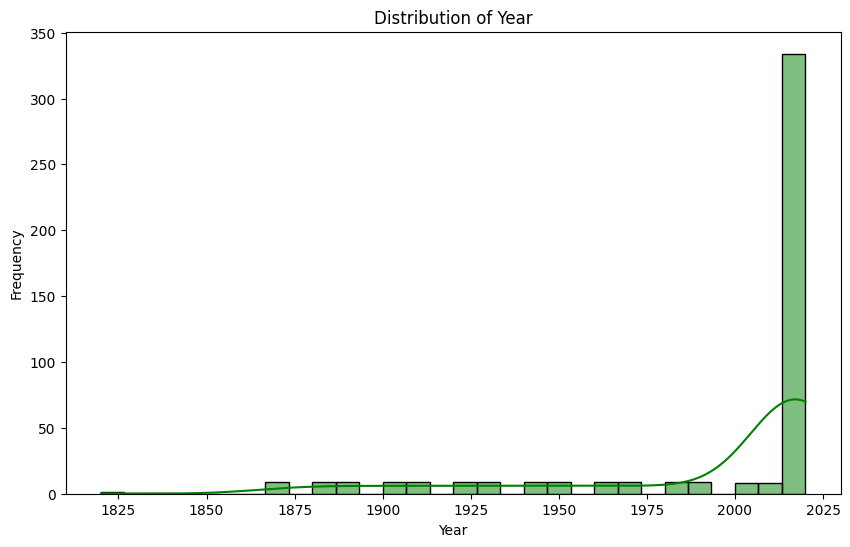

<Figure size 1200x800 with 0 Axes>

In [19]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/My Drive/dataset_cho_python3.csv'
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='latin1')

# Process numeric columns
def process_numeric_columns(data, columns):
    for col in columns:
        print(data[col])

process_numeric_columns(data=data, columns=[ 'Code', 'Year'])

#Generate and save plots
def generate_plots(data):
    plots = [
        {
            'title': 'Distribution of Code',
            'x': 'Code',
            'kind': 'hist',
            'color': 'blue',
            'file': 'Code.png'
        },
        {
            'title': 'Distribution of Year',
            'x': 'Year',
            'kind': 'hist',
            'color': 'green',
            'file': 'Year.png'
        }
    ]

    for plot in plots:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[plot['x']].dropna(), bins=30, kde=True, color=plot['color'])
        plt.title(plot['title'])
        plt.xlabel(plot['x'].replace('_', ' ').title())
        plt.ylabel('Frequency')
        plt.savefig(plot['file'])

    # Bar plots for categorical data
    bar_plots = [
        {
            'groupby': 'code',
            'title': 'Total Layoffs by Industry',
            'file': 'Code.png',
            'top_n': None,
            'color': 'orange'
        },
        {
            'groupby': 'year',
            'title': 'Top 10 Locations by Total Layoffs',
            'file': 'Year.png',
            'top_n': 10,
            'color': 'purple'
        }
    ]

    for plot in bar_plots:
        plt.figure(figsize=(12, 8))
        group_data = plot['groupby']['code']
        if plot['top_n']:
            group_data = group_data.head(plot['top_n'])
        group_data.plot(kind='bar', color=plot['color'])
        plt.title(plot['title'])
        plt.xlabel(plot['groupby'].replace('_', ' ').title())
        plt.ylabel('Total Layoffs')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(plot['file'])
# Generate the plots
generate_plots(data)